<a href="https://colab.research.google.com/github/andluizsouza/Machine-Learning-projects/blob/master/Intro_to_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Introdução a classificação com SKLearn**

## **Projeto 01**

> 1. Features: características de uma amostra
> 2. Treinamento supervisionado
> 3. Acurácia: taxa de acerto

### **Características**

> Definição os critérios de classificação:
1.  pelo longo?
2. perna curta?
3. faz auau?

In [0]:
porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cao1 = [0,1,1]
cao2 = [1,0,1]
cao3 = [1,1,1]

# Amostras de treino
train_x = [porco1, porco2, porco3, cao1, cao2, cao3]
# 0 == cao ou 1 == porco
train_y = [1, 1, 1, 0, 0, 0] # labels

### **Treinamento**

In [0]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Como fazer predições com esse modelo?

In [0]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])


array([0])

Calculando a acurácia/precisão do modelo com uma amostra teste conhecida

In [0]:
test1 = [1,1,1]
test2 = [1,0,1]
test3 = [1,0,1]
test4 = [1,0,0]
test_x = [test1, test2, test3, test4]
test_y = [0, 1, 0, 1]

predictions = model.predict(test_x)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.75

## **Projeto 02**

> Importando um arquivo csv via uri: acessos a um website


In [0]:
import pandas as pd
uri_name = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
csv_data = pd.read_csv(uri_name)
csv_data.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [0]:
data_x = csv_data[['home', 'how_it_works', 'contact']]
data_y = csv_data[['bought']]

### **Treino vs teste**

Separando 75% da amostra total para treinamento do modelo e usando 25% para teste

In [0]:
len_data = csv_data.shape[0]
index_train = int(0.75*len_data)
train_x_web = data_x[:index_train]
train_y_web = data_y[:index_train]

In [0]:
test_x_web = data_x[index_train:]
test_y_web = data_y[index_train:]

### **Acurácia do modelo**

In [0]:
model_web = LinearSVC()
model_web.fit(train_x_web, train_y_web)
predict_web = model_web.predict(test_x_web)
score = accuracy_score(test_y_web, predict_web)*100
print("The accuracy score is %.2f%%" % score)

The accuracy score is 96.00%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **Usando train_test_split**

Separação aleatória

In [0]:
from sklearn.model_selection import train_test_split
train_x_web, test_x_web, train_y_web, test_y_web = train_test_split(data_x, data_y, test_size=0.25)

model_web = LinearSVC()
model_web.fit(train_x_web, train_y_web)
predict_web = model_web.predict(test_x_web)
score = accuracy_score(test_y_web, predict_web)*100
print("The accuracy score is %.2f%%" % score)

The accuracy score is 96.00%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> Dessa forma teremos um resultado diferente para cada rodada 
>> random_state definido quebra a aleatoriedade da separação 

> As amostras de treino e de teste devem ter a mesma proporção de respostas true/false
>> estratificar em data_y

In [0]:
SEED = 20
train_x_web, test_x_web, train_y_web, test_y_web = train_test_split(
    data_x, data_y, test_size=0.25, random_state=SEED, stratify=data_y)

model_web = LinearSVC()
model_web.fit(train_x_web, train_y_web)
predict_web = model_web.predict(test_x_web)
score = accuracy_score(test_y_web, predict_web)*100
print("The accuracy score is %.2f%%" % score)

The accuracy score is 96.00%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Projeto 03**





Como podemos prever se um trabalho será finalizado ou não?

In [0]:
import pandas as pd
uri_name = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
csv_data = pd.read_csv(uri_name)
csv_data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Adicionando uma coluna 'finished'

In [0]:
add_finished = {0: 1, 1: 0}
csv_data['finished'] = csv_data['unfinished'].map(add_finished)
csv_data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [0]:
!pip install seaborn==0.9.0

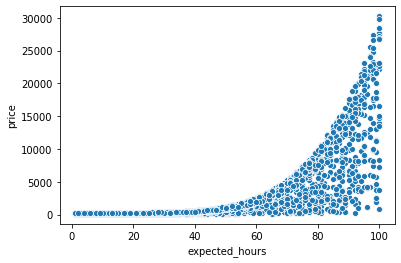

In [0]:
import seaborn as sns
sns.scatterplot(x='expected_hours', y='price', data=csv_data)

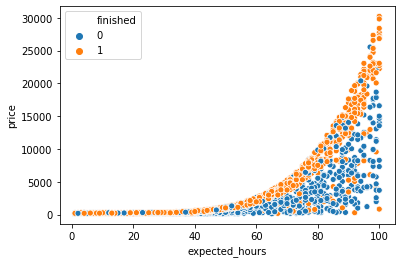

In [0]:
sns.scatterplot(x='expected_hours', y='price', hue='finished', data=csv_data)

Existe uma tendência para os trabalhos finalizados: um valor mínimo por horas esperadas

### **Modelagem e acurácia**

Separando as amostras de treino e de teste

In [0]:
data_x = csv_data[['expected_hours', 'price']]
data_y = csv_data[['finished']]

SEED = 20
train_x_web, test_x_web, train_y_web, test_y_web = train_test_split(
    data_x, data_y, test_size=0.25, random_state=SEED, stratify=data_y)
print("The train was made with %d elements and the test with %d elements" %(len(train_x_web), len(test_x_web)))

The train was made with 1617 elements and the test with 540 elements


Ajustando um modelo linear sobre a amostra de treino



In [0]:
model_web = LinearSVC()
model_web.fit(train_x_web, train_y_web)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

- Usando a amostra de teste naquele modelo linear para fazer uma predição
- Comparando a predição do modelo (predict_web) com a resposta real (test_y_web) através da acurácia

In [0]:
predict_web = model_web.predict(test_x_web)
score_model = accuracy_score(test_y_web, predict_web)*100
print("The accuracy score is %.2f%%" % score_model)

The accuracy score is 57.41%


### **Baseline test**

- Como validar a acurácia do modelo? 
- Aquele accuracy score é bom ou ruim?


Definimos um **baseline test**: uma previsão "chute", sem nenhum tipo de modelagem.

In [0]:
import numpy as np
baseline_predict = np.ones(len(test_x_web))
score_baseline = accuracy_score(test_y_web, baseline_predict)*100
print("The baseline accuracy score is %.2f%%" % score_baseline)

The baseline accuracy score is 52.59%


- A predição do modelo (score_model) usando uma amostra de treino deveria ser muito melhor do que a predição "chute" (score_baseline)
- Se não, isso significa que o treinamento foi ineficiente ou impreciso

Comparando amostras de treino e de teste

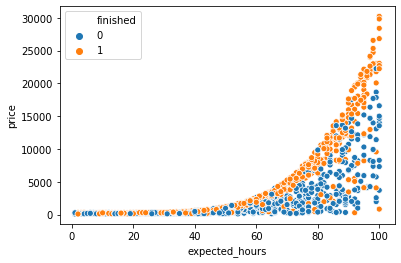

In [0]:
sns.scatterplot(x='expected_hours', y='price', hue=train_y_web['finished'], data=train_x_web)

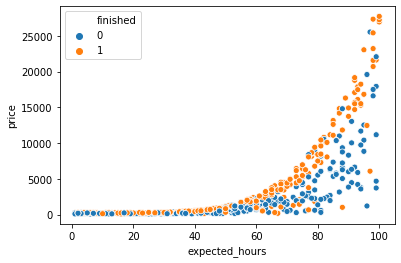

In [0]:
sns.scatterplot(x='expected_hours', y='price', hue=test_y_web['finished'], data=test_x_web)

- As amostras de treino e de teste seguem a mesma tendência do conjunto original
- Há uma **curva de decisão** sobre a finalização ou não do trabalho

### **Curva de decisão**

Criando uma lista para cada eixo

In [0]:
hours_min = data_x['expected_hours'].min()
hours_max = data_x['expected_hours'].max()
price_min = data_x['price'].min()
price_max = data_x['price'].max()

pixel = 100
hours_array = np.arange(hours_min, hours_max, (hours_max-hours_min)/pixel)
price_array = np.arange(price_min, price_max, (price_max-price_min)/pixel)

Criando uma lista com todos os pares ordenados

In [0]:
xx, yy = np.meshgrid(hours_array, price_array)
all_points = np.c_[xx.ravel(), yy.ravel()]
all_points.shape

(10000, 2)

Calculando as previsões de todos esses pontos a partir do modelo de ajuste linear sobre a amostra de treino

In [0]:
all_predict = model_web.predict(all_points)
all_predict = all_predict.reshape(xx.shape)

Plotando o conjunto original de dados com as previsões do modelo sobre todo o espaço amostral

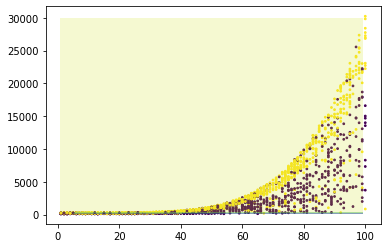

In [0]:
import matplotlib.pyplot as plt
plt.scatter(data_x['expected_hours'], data_x['price'], c=data_y['finished'], s=3)
plt.contourf(xx, yy, all_predict, alpha=0.2)

A curva teórica de decisão é **péssima**: o modelo basicamente atribui 'finished' para todos os trabalhos
- O modelo de ajuste linear não é apropriado para esse conjunto de dados
- LinearSVC também tem um _random_state_ ([read me](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html))
- Precisamos usar outros algoritmos de ajuste: [Support Vector Machine](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
- Outro problemas: estimadores não-lineares são dependentes da escala das variáveis. Em geral, devemos primeiro renormalizá-las com a livraria [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


### **Estimador não-linear**

Aqui vamos importar um estimador não-linear: SVC

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Separando amostras de treino e de teste

In [0]:
SEED = 5
np.random.seed(SEED)

data_x = csv_data[['expected_hours', 'price']]
data_y = csv_data[['finished']]

raw_train_x, raw_test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.25, random_state=SEED, stratify=data_y)
print("The train was made with %d elements and the test with %d elements" %(len(raw_train_x), len(raw_test_x)))

The train was made with 1617 elements and the test with 540 elements


**Rescalonamento das variáveis**
- rescalonamento de acordo com a amostra de treino _raw_train_x_
- novos x's de treino e de teste variando entre -2 e +2

In [0]:
scaler = StandardScaler()
scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

Usando o estimador SVC não-linear para criar o modelo de ajuste

In [0]:
model_nonlin = SVC()
model_nonlin.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Calculando a acurácia do modelo não-linear e com as variáveis rescalonadas

In [0]:
predict_nonlin = model_nonlin.predict(test_x)
score_model = accuracy_score(test_y, predict_nonlin)*100
print("The accuracy score from non-linear model is %.2f%%" % score_model)

The accuracy score from non-linear model is 66.85%


- O resultado é bem melhor que o do modelo linear
- Vamos fazer predições com o modelo não-linear para todo o espaço amostral rescalonado

In [0]:
axis_x = test_x[:,0]
axis_y = test_x[:,1]

xmin = axis_x.min()
xmax = axis_x.max()
ymin = axis_y.min()
ymax = axis_y.max()

pixel = 100
x_array = np.arange(xmin, xmax, (xmax-xmin)/pixel)
y_array = np.arange(ymin, ymax, (ymax-ymin)/pixel)

xx, yy = np.meshgrid(x_array, y_array)
all_points = np.c_[xx.ravel(), yy.ravel()]

all_predict = model_nonlin.predict(all_points)
all_predict = all_predict.reshape(xx.shape)

**Plot da curva de decisão**

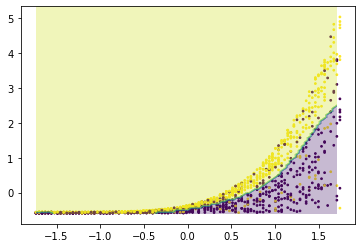

In [0]:
import matplotlib.pyplot as plt
plt.scatter(train_x[:,0], train_x[:,1], c=train_y['finished'], s=3)
plt.contourf(xx, yy, all_predict, alpha=0.3)

Esse novo estimador soube reproduzir a curva de decisão vista no conjunto de dados original